# ch2.[실습 1] 학습 데이터 전체 실습

### Key Point
    - 데이터 유형에 따른 데이터 로드 및 데이터 확인
    - Data Sampling 실습
    - Class Imbalance 처리 알고리즘 실습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
from datetime import datetime

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import boxcox, norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats.mstats import kruskal
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV

# library for sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier
from xgboost import plot_importance

## 1. Data 유형 확인

In [ ]:
!pwd
path_lecture = "./drive/MyDrive/MLOps_Signature/Lecture_Practice/CH02/DataPreparing/"
random_state = 1234

/content


#### 1) 정형 데이터 확인

In [ ]:
df = pd.read_csv(path_lecture + "data/winequality.csv")
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

#### 2) 반정형 데이터 확인

In [ ]:
import json

# 샘플 JSON 데이터
data_str = """{
    "employees": [
        {"name": "Alice", "age": 28, "occupation": "Engineer"},
        {"name": "Bob", "age": 24, "occupation": "Data Scientist"},
        {"name": "Charlie", "age": 22, "occupation": "Designer"}
    ]
}"""

data = json.loads(data_str)
for employee in data["employees"]:
    print(employee)


{'name': 'Alice', 'age': 28, 'occupation': 'Engineer'}
{'name': 'Bob', 'age': 24, 'occupation': 'Data Scientist'}
{'name': 'Charlie', 'age': 22, 'occupation': 'Designer'}


In [ ]:
data["employees"][0]["income"] = 10000

In [ ]:
data["employees"][0]

{'name': 'Alice', 'age': 28, 'occupation': 'Engineer', 'income': 10000}

In [ ]:
data["employees"][1]

{'name': 'Bob', 'age': 24, 'occupation': 'Data Scientist'}

#### 3) 비정형 데이터 확인

In [ ]:
from PIL import Image

In [ ]:
img = Image.open(path_lecture + "data/dog_sample_image.jpeg")

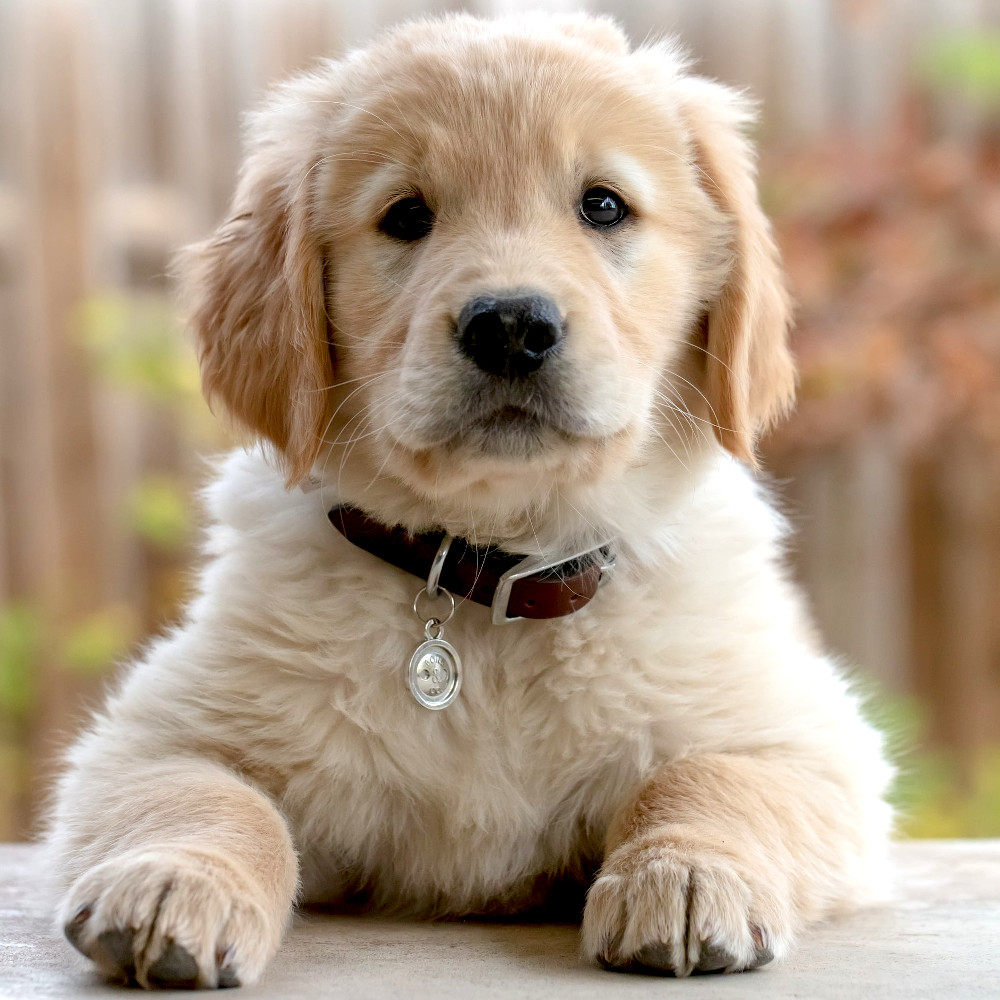

In [ ]:
img

In [ ]:
# 1. 이미지 상하반전
flipped_image = img.transpose(Image.FLIP_TOP_BOTTOM)

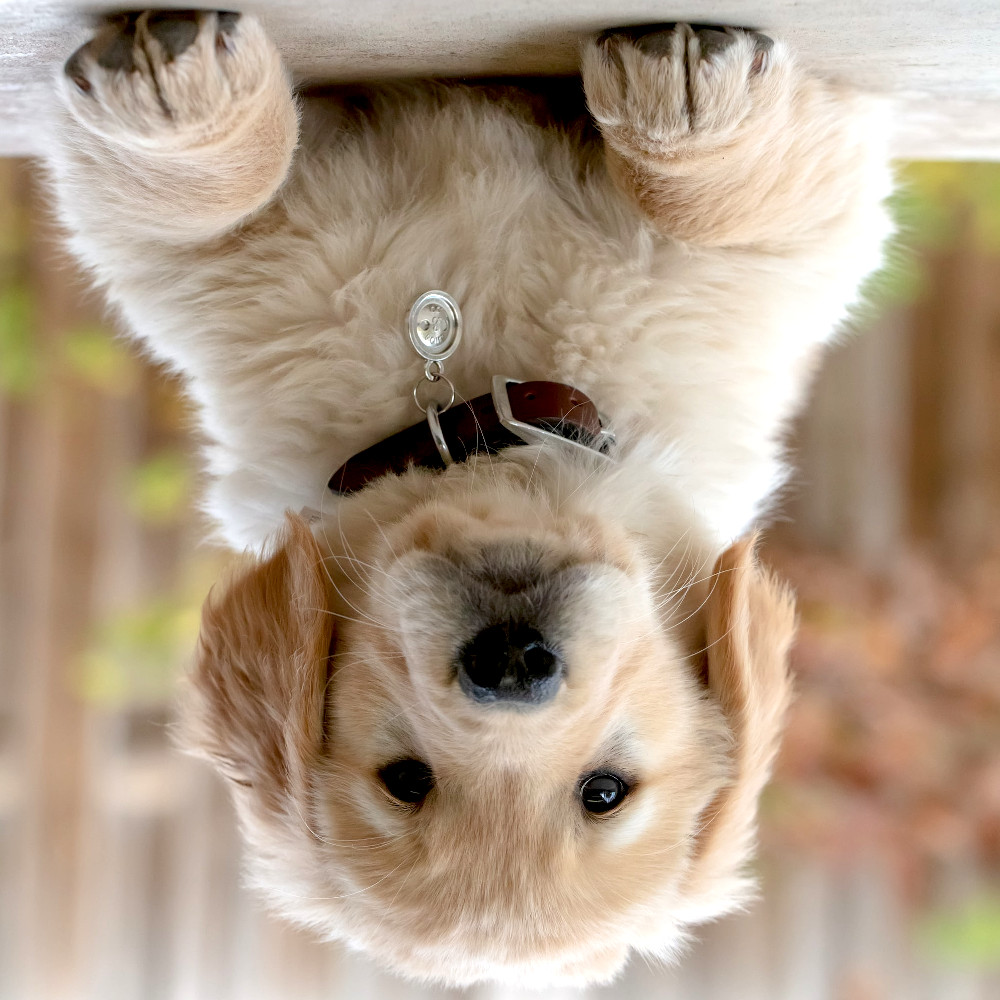

In [ ]:
flipped_image

In [ ]:
# 2. 이미지 좌우반전
mirrored_image = img.transpose(Image.FLIP_LEFT_RIGHT)

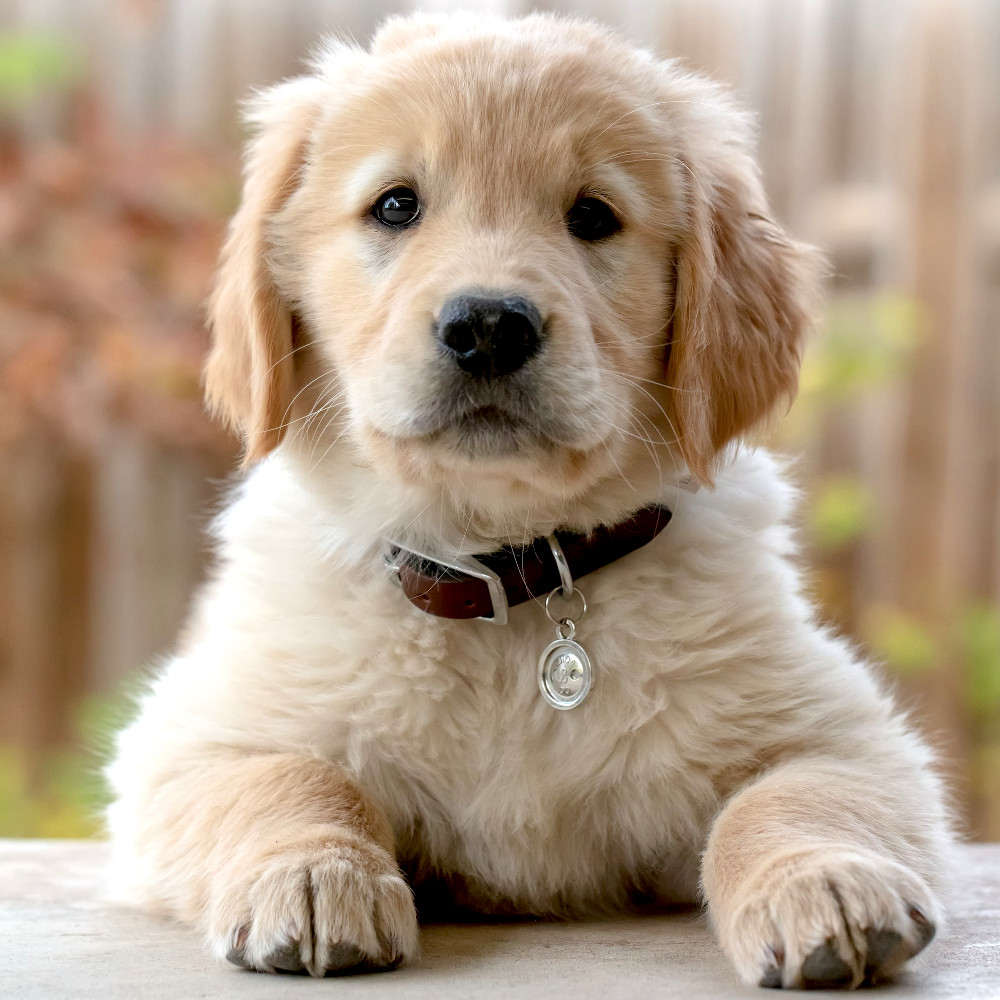

In [ ]:
mirrored_image

In [ ]:
# 이미지 축소 (반으로 축소)
width, height = img.size
shrinked_image = img.resize((width // 2, height // 2))

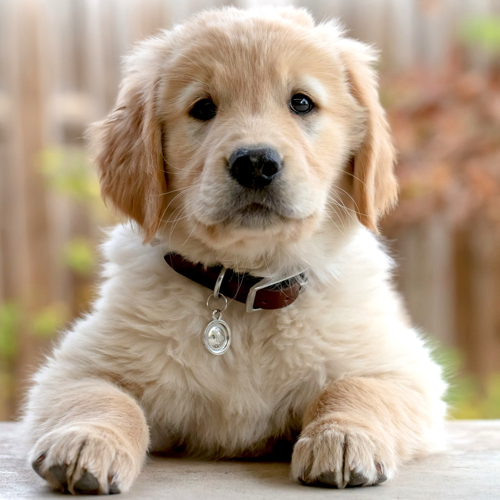

In [ ]:
shrinked_image

## 2. Data Sampling

In [ ]:
# 가상의 데이터 생성
data = pd.DataFrame({
    'Age': np.random.randint(20, 40, 100),
    'Income': np.random.randint(50000, 100000, 100)
})

In [ ]:
data.head(10)

Age  Income
0   21   87295
1   24   71551
2   38   62301
3   30   87932
4   39   63970
5   36   71207
6   28   58534
7   20   68923
8   31   57881
9   32   82891

#### 1) Random Sampling

In [ ]:
# 무작위로 10개의 데이터 선택
random_samples = data.sample(n=10)
print(random_samples)

    Age  Income
73   34   85403
66   34   81000
42   38   71445
32   28   99952
92   36   92132
91   38   73088
74   38   69225
78   20   54166
94   32   67506
3    30   87932


#### 2) Stratified Sampling

In [ ]:
# 'Age' 컬럼을 기준으로 층화 샘플링
train, test = train_test_split(data, test_size=0.2, stratify=data['Age'])
print(train)


    Age  Income
53   34   68842
91   38   73088
25   29   67909
34   26   59822
65   38   94697
..  ...     ...
55   34   58368
99   27   68304
12   24   55206
58   27   55443
41   29   58362

[80 rows x 2 columns]


#### 3) Cluster Sampling


In [ ]:
# 클러스터 생성을 위해 'Age'를 기준으로 데이터 분할
data['cluster'] = pd.cut(data['Age'], bins=[20, 25, 30, 35, 40], labels=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])

# 무작위로 클러스터 선택
selected_cluster = np.random.choice(data['cluster'].unique())

cluster_samples = data[data['cluster'] == selected_cluster]
print(cluster_samples)


    Age  Income    cluster
3    30   87932  cluster_2
6    28   58534  cluster_2
13   27   60492  cluster_2
17   28   85418  cluster_2
20   27   77778  cluster_2
21   30   90373  cluster_2
22   30   78026  cluster_2
25   29   67909  cluster_2
26   28   54934  cluster_2
28   27   79000  cluster_2
29   29   86718  cluster_2
32   28   99952  cluster_2
34   26   59822  cluster_2
36   30   80795  cluster_2
37   28   92719  cluster_2
41   29   58362  cluster_2
46   30   50518  cluster_2
47   30   75995  cluster_2
49   29   73278  cluster_2
52   30   72055  cluster_2
58   27   55443  cluster_2
63   28   69629  cluster_2
68   28   67964  cluster_2
75   28   88301  cluster_2
80   26   84098  cluster_2
87   27   96513  cluster_2
89   29   50283  cluster_2
90   30   91457  cluster_2
93   27   80936  cluster_2
98   30   85171  cluster_2
99   27   68304  cluster_2


#### 4) Weight Sampling


In [ ]:
weights = np.random.rand(len(data))
weight_samples = data.sample(n=10, weights=weights)
print(weight_samples)

    Age  Income    cluster
53   34   68842  cluster_3
64   32   64740  cluster_3
62   23   98376  cluster_1
42   38   71445  cluster_4
52   30   72055  cluster_2
27   21   53473  cluster_1
68   28   67964  cluster_2
88   22   51812  cluster_1
65   38   94697  cluster_4
87   27   96513  cluster_2


#### 5) Importance Sampling

In [ ]:
# 가중치 샘플링의 특별한 경우로, 특정 함수의 기대값을 추정하는 데 사용되는 샘플링 방법입
def importance_function(x):
    return x**2

weights = importance_function(data['Income'])
normalized_weights = weights / sum(weights)
importance_samples = data.sample(n=10, weights=normalized_weights)
print(importance_samples)


    Age  Income    cluster
30   23   63865  cluster_1
20   27   77778  cluster_2
14   39   70592  cluster_4
0    21   87295  cluster_1
40   22   96785  cluster_1
15   34   83418  cluster_3
84   22   61743  cluster_1
28   27   79000  cluster_2
77   20   77108        NaN
48   21   69016  cluster_1


##Data Labeling에 따른 모델 학습 유형

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_iris()


### 1) Supervised Learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

# 모델 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 예측
predictions = clf.predict(X_test)
print(predictions)

[2 0 0 1 1 2 2 2 2 1 2 1 0 0 1 1 0 0 1 2 0 0 0 0 2 0 1 0 0 2]


### 2) Un-Supervised Learning

In [ ]:
from sklearn.cluster import KMeans

# 클러스터링 모델 학습
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data.data)

print(clusters)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 3) Semi-Supervised Learning

In [ ]:
from sklearn.semi_supervised import LabelSpreading

# 일부 라벨만 사용
labels = np.copy(data.target)
random_unlabeled_points = np.random.rand(len(labels)) < 0.5
labels[random_unlabeled_points] = -1

# 모델 학습
lp_model = LabelSpreading()
lp_model.fit(data.data, labels)

# 예측
lp_predictions = lp_model.predict(data.data)
print(lp_predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Class Imbalance

### Sampling for Class Imbalance
*   이번 실습에서는 두 가지 oversampling 기법을 활용하고, 두 가지로 만들어진 데이터를 활용하여 Model optimization 진행
*   SMOTE : Synthetic Minority Overf-sampling Technique. minority class에서 synthetic sampling을 생성하는 방법. 특정 minority class A에서 knn 기준으로 가까운 minority class Set K를 생성하고, A와 Set K 사이 간에 새로운 관측치를 생성하는 기법.  
*   ADASYN : Adaptive Synthetic Sampling Approach. SMOTE는 minority class당 동일한 숫자 sample을 새롭게 생성하지만, ADASYN은 멀리 떨어진 minority class간에 더 많은 관측치를 생성



##### 데이터 로드

In [ ]:
X_base = pd.read_csv(path_lecture + "data/winequality_for_class_imbalance.csv")
X_base.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0      -0.165087         -0.440021     0.280208        3.477382   
1           1      -0.695163         -0.261684     0.144245       -0.766859   
2           2       0.667890         -0.380575     0.552136        0.410863   
3           3      -0.013636         -0.677803     0.008281        0.766401   
4           4      -0.770888         -0.142793    -1.079428        0.433084   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0  -0.316815             0.838865              0.984149  2.177419 -1.401186   
1  -0.208407            -0.900220              0.314921 -0.180598  0.472180   
2  -0.181305            -0.002628             -0.301474  0.189947  0.222398   
3   0.035512             0.951064              1.265929  0.358377 -0.214721   
4  -0.316815            -0.002628              0.385366  0.122576 -0.277166   

   sulphates   alcohol  type_red  type_white  
0  -0.555267 -1.475154         0           1  
1  -0.288309 -0.885144         0           1  
2  -0.622007 -0.379421         0           1  
3  -0.888964 -0.547996         0           1  
4  -0.421788 -0.800857         0           1

In [ ]:
X_base = X_base.drop('Unnamed: 0', axis=1)

In [ ]:
Y_encoded = np.load(path_lecture + "data/winequality_for_class_imbalance_label.npy")

In [ ]:
Y_encoded

array([3, 3, 3, ..., 2, 2, 3])

##### SMOTE

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_base, Y_encoded, test_size=0.25, stratify=Y_encoded)

In [ ]:
sm = SMOTE(random_state=random_state, k_neighbors=3)
X_sm_sampling, y_sm_sampling = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

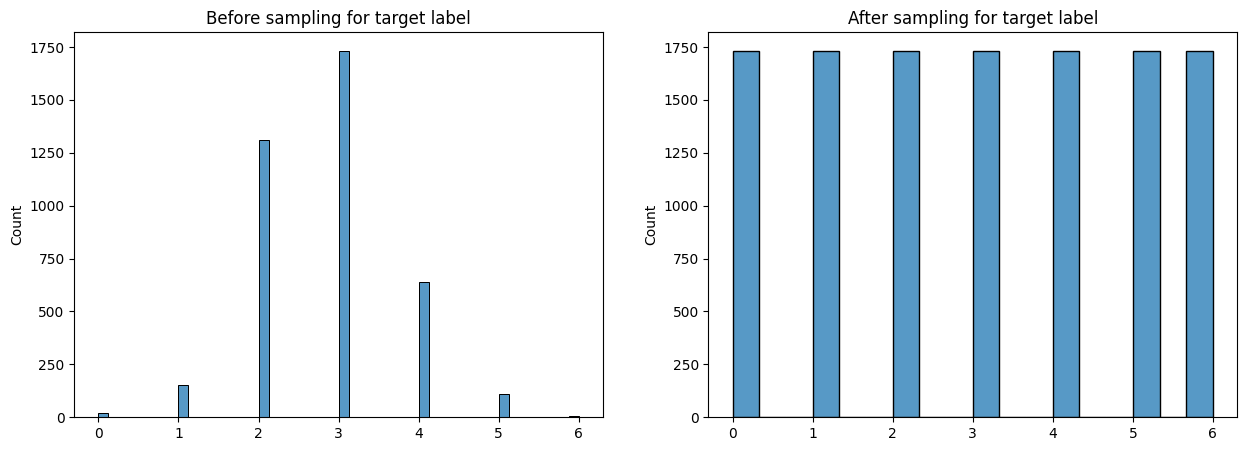

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_sm_sampling)
plt.title("After sampling for target label")

##### ADASYN

In [ ]:
ada = ADASYN(random_state=random_state, n_neighbors=3)
X_ada_sampling, y_ada_sampling = ada.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

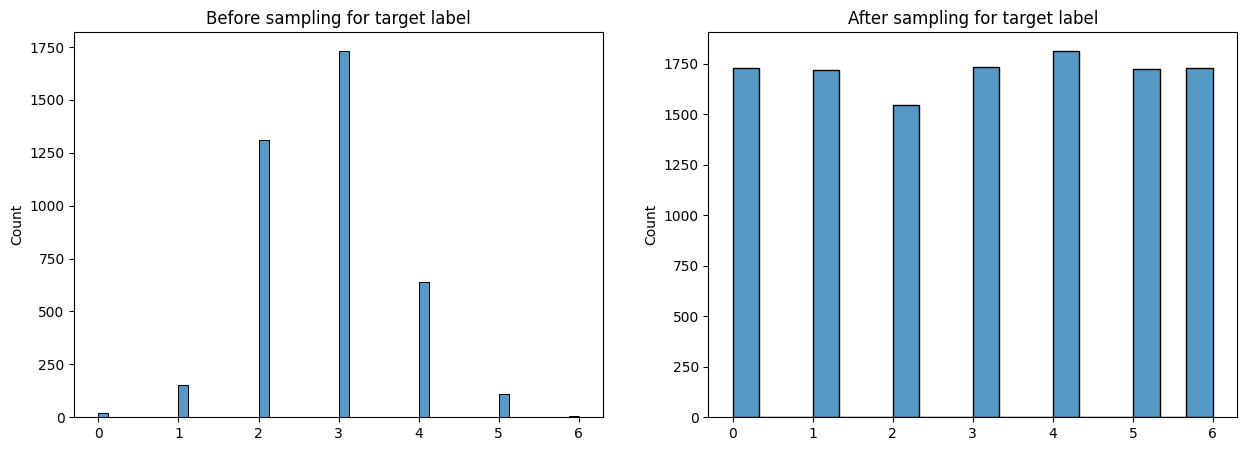

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_ada_sampling)
plt.title("After sampling for target label")